In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

#import requests library and weather api key
import requests
from config import weather_api_key

#import datetime from datetime module
from datetime import datetime

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)

#pack lats and lngs together as pairs by zipping them in a zip function
lats_lngs = zip(lats, lngs)

lats_lngs

In [3]:
#add latitudes and longitudes to a list 
coordinates = list(lats_lngs)

In [4]:
#create a list for holding the cities
cities = []

#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique then add it to the cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

598

In [6]:
#build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key


In [10]:
#create an empty like to hold weather data
city_data = []

#print beginning of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | longlac
City not found. Skipping...
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | tumpat
Processing Record 7 of Set 1 | ravar
Processing Record 8 of Set 1 | pangnirtung
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | rawson
Processing Record 13 of Set 1 | hastings
Processing Record 14 of Set 1 | sinnamary
Processing Record 15 of Set 1 | novo aripuana
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | isangel
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | floresta
Processing Record 22 of Set 1 | sayabec
City no

Processing Record 37 of Set 4 | lorengau
Processing Record 38 of Set 4 | hofn
Processing Record 39 of Set 4 | tevaitoa
Processing Record 40 of Set 4 | aklavik
Processing Record 41 of Set 4 | ongandjera
Processing Record 42 of Set 4 | gornozavodsk
Processing Record 43 of Set 4 | guskhara
Processing Record 44 of Set 4 | vilyuysk
Processing Record 45 of Set 4 | kaitangata
Processing Record 46 of Set 4 | aripuana
Processing Record 47 of Set 4 | batemans bay
Processing Record 48 of Set 4 | funadhoo
Processing Record 49 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 50 of Set 4 | yerbogachen
Processing Record 1 of Set 5 | keetmanshoop
Processing Record 2 of Set 5 | buariki
City not found. Skipping...
Processing Record 3 of Set 5 | mazagao
Processing Record 4 of Set 5 | ocampo
Processing Record 5 of Set 5 | kahului
Processing Record 6 of Set 5 | banes
Processing Record 7 of Set 5 | krasnovishersk
Processing Record 8 of Set 5 | hay river
Processing Record 9 of 

Processing Record 29 of Set 8 | chicama
Processing Record 30 of Set 8 | elliot lake
Processing Record 31 of Set 8 | zhicheng
Processing Record 32 of Set 8 | onega
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | nipawin
Processing Record 35 of Set 8 | samarai
Processing Record 36 of Set 8 | cedral
Processing Record 37 of Set 8 | jensen beach
Processing Record 38 of Set 8 | altay
Processing Record 39 of Set 8 | kudahuvadhoo
Processing Record 40 of Set 8 | oxelosund
Processing Record 41 of Set 8 | daru
Processing Record 42 of Set 8 | vila velha
Processing Record 43 of Set 8 | alotau
City not found. Skipping...
Processing Record 44 of Set 8 | parit buntar
Processing Record 45 of Set 8 | pontes e lacerda
Processing Record 46 of Set 8 | thinadhoo
Processing Record 47 of Set 8 | yar-sale
Processing Record 48 of Set 8 | amderma
City not found. Skipping...
Processing Record 49 of Set 8 | contai
Processing Record 50 of Set 8 | asau
Processing Record 1 of Set 9 | arefu
Pr

Processing Record 20 of Set 12 | catamarca
Processing Record 21 of Set 12 | rocha
Processing Record 22 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 23 of Set 12 | ilulissat
Processing Record 24 of Set 12 | pochutla
Processing Record 25 of Set 12 | nogliki
Processing Record 26 of Set 12 | aksarka
Processing Record 27 of Set 12 | edd
Processing Record 28 of Set 12 | zeya
Processing Record 29 of Set 12 | midland
Processing Record 30 of Set 12 | rungata
City not found. Skipping...
Processing Record 31 of Set 12 | burica
City not found. Skipping...
Processing Record 32 of Set 12 | nelson bay
Processing Record 33 of Set 12 | ugoofaaru
Processing Record 34 of Set 12 | ligayan
Processing Record 35 of Set 12 | high level
Processing Record 36 of Set 12 | carpen
Processing Record 37 of Set 12 | koungheul
Processing Record 38 of Set 12 | socorro
Processing Record 39 of Set 12 | yenagoa
Processing Record 40 of Set 12 | hualmay
Processing Record 41 of Set 12 | krasnoselkup
Pro

In [11]:
len(city_data)

552

In [12]:
#convert the array of values into a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,51.80,62,75,16.11,AR,2021-04-02 21:26:17
1,Tuktoyaktuk,69.4541,-133.0374,-14.80,70,75,6.91,CA,2021-04-02 21:26:17
2,Bredasdorp,-34.5322,20.0403,50.00,93,32,4.61,ZA,2021-04-02 21:21:27
3,Cape Town,-33.9258,18.4232,64.00,67,0,6.91,ZA,2021-04-02 21:26:18
4,Tumpat,6.1978,102.1710,75.20,94,20,3.36,MY,2021-04-02 21:26:18
5,Ravar,31.2656,56.8055,73.31,33,84,5.93,IR,2021-04-02 21:26:18
6,Pangnirtung,66.1451,-65.7125,-13.00,58,1,2.30,CA,2021-04-02 21:26:19
7,Bambous Virieux,-20.3428,57.7575,77.00,100,40,3.44,MU,2021-04-02 21:26:19
8,Faanui,-16.4833,-151.7500,81.45,70,0,2.17,PF,2021-04-02 21:26:19
9,Rikitea,-23.1203,-134.9692,77.05,78,99,11.48,PF,2021-04-02 21:26:19


In [13]:
#reorder the columns in the dataframe to City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_col_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-04-02 21:26:17,-54.8000,-68.3000,51.80,62,75,16.11
1,Tuktoyaktuk,CA,2021-04-02 21:26:17,69.4541,-133.0374,-14.80,70,75,6.91
2,Bredasdorp,ZA,2021-04-02 21:21:27,-34.5322,20.0403,50.00,93,32,4.61
3,Cape Town,ZA,2021-04-02 21:26:18,-33.9258,18.4232,64.00,67,0,6.91
4,Tumpat,MY,2021-04-02 21:26:18,6.1978,102.1710,75.20,94,20,3.36
5,Ravar,IR,2021-04-02 21:26:18,31.2656,56.8055,73.31,33,84,5.93
6,Pangnirtung,CA,2021-04-02 21:26:19,66.1451,-65.7125,-13.00,58,1,2.30
7,Bambous Virieux,MU,2021-04-02 21:26:19,-20.3428,57.7575,77.00,100,40,3.44
8,Faanui,PF,2021-04-02 21:26:19,-16.4833,-151.7500,81.45,70,0,2.17
9,Rikitea,PF,2021-04-02 21:26:19,-23.1203,-134.9692,77.05,78,99,11.48


In [14]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#export city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
#extract relevant fields from dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

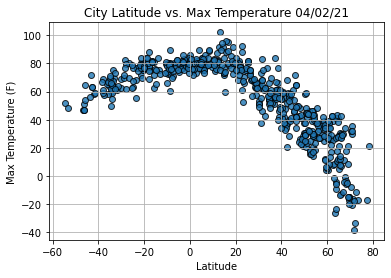

In [16]:
#import time module
import time

#build scatter plot for latitude vs max tempuratures
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

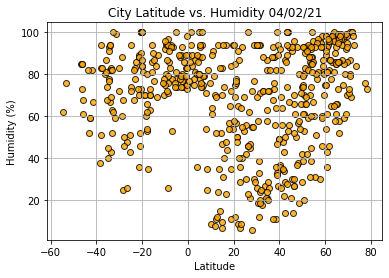

In [21]:
#import time module
import time

#build scatter plot for latitude vs max tempuratures
plt.scatter(lats, humidity, edgecolor="black", color="orange", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

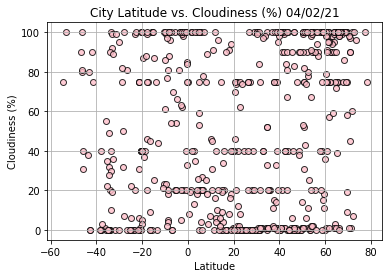

In [22]:
#import time module
import time

#build scatter plot for latitude vs max tempuratures
plt.scatter(lats, cloudiness, edgecolor="black", color="pink", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

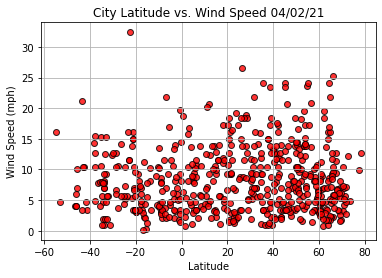

In [23]:
#import time module
import time

#build scatter plot for latitude vs max tempuratures
plt.scatter(lats, wind_speed, edgecolor="black", color="red", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()